In [ ]:
import pandas as pd
import numpy as np

Цель: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

In [ ]:
data = pd.read_csv('/content/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


1. Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [ ]:
# удалите пропуски по необходимости
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]
data.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [ ]:
len(data['nationality'].unique())

200

In [ ]:
# закодируйте категориальные переменные числовыми
#  значениями по необходимости.
# замена признаков через pd.get_dummies
selected_col = ['nationality','sport'] # 'id', 'name','sex'
X = pd.get_dummies(data, columns = selected_col, drop_first = True)
# X.head()
# # X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,id,name,sex,dob,height,weight,gold,silver,bronze,nationality_ALB,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,736041664,A Jesus Garcia,male,10/17/69,1.72,64.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,532037425,A Lam Shin,female,9/23/86,1.68,56.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435962603,Aaron Brown,male,5/27/92,1.98,79.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,521041435,Aaron Cook,male,1/2/91,1.83,80.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# y = X.apply(lambda x: 3*x['gold'] + 2*x['silver'] + 1 * x['bronze'], axis = 1)
# # место 1 = 3 балла, за 2-ое = 2 и за 3 - 1. без места = 0 баллов.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:

# y_col = ['gold','silver','bronze']
# y = X[y_col]
# X = data
del X['name']
del X['dob']
del X['sex']
# del X['nationality']
# del X['sport']
del X['id']

In [ ]:
X

,height,weight,gold,silver,bronze,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,1.64,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11534,1.73,63.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11535,1.85,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11536,1.60,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test, Y_test)

0.8293431553100061

In [ ]:
model.score(X_train, Y_train)

0.8442105263157895

In [ ]:
predictions = model.predict_proba(X_test)
predictions

array([[0.04676741, 0.95323259],
       [0.05238163, 0.94761837],
       [0.6920336 , 0.3079664 ],
       ...,
       [0.69911245, 0.30088755],
       [0.54951981, 0.45048019],
       [0.96116736, 0.03883264]])

3.Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( Y_test, predictions[:,1])
# thres

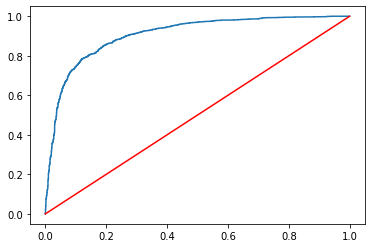

In [ ]:
from matplotlib import pyplot as plt
plt.plot( fpr, tpr )
plt.plot([0,1],[0,1],'-r')

4.Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, predictions[:, 1])

0.9055582188132523

5.Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
# fpr = fp / (fp + tn)
# tpr = tp/(tp + fn)

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative
for pred_prob, actual in zip( predictions[:, 1], Y_test ):
    if pred_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn )

0.8293431553100061

In [ ]:
# правильно ли справилась с оценкой позитивного класса
# нсколько чисто определили позитивные классы
precision_05 = tp / (tp + fp)
precision_05

0.85

In [ ]:
fpr_05 = fp / (fp + tn)
tpr_05 = tp/(tp + fn) #recall - полнота
fpr_05,tpr_05

(0.17959183673469387, 0.8366890380313199)

In [ ]:
def tpr_fpr(Y_test, pred):
  fr = []
  tr = []
  th = []
  for thres in np.arange(0,1,0.01):
    th.append(thres)
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for pred_prob, actual in zip( pred, Y_test ):
        if pred_prob >= thres:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    fpr = fp / (fp + tn + 1e-30)
    fr.append(fpr)
    tpr = tp/(tp + fn+ 1e-30)
    tr.append(tpr)
  return fr,tr,th

In [ ]:
fpr_my, tpr_my, thres_my = tpr_fpr(Y_test, predictions[:, 1])

In [ ]:
# thres_my

In [ ]:
# plt.plot( fpr_my, tpr_my)
# plt.plot([0,1],[0,1],'-r')

6.Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

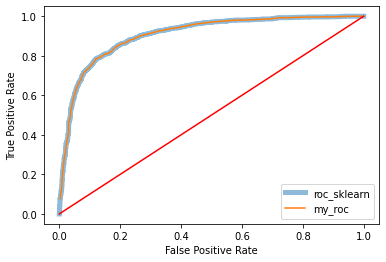

In [ ]:
plt.plot( fpr, tpr, label = 'roc_sklearn',alpha =0.5 ,  lw= 5 )
plt.plot( fpr_my, tpr_my, label = 'my_roc' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'-r')

plt.legend( loc = 0 )
plt.show()

7.Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

не поняла как по посчитанным строить, посчитала ещё раз, нужные

In [ ]:
def per_rec(Y_test, pred):
  pr = []
  tr = [] #recall
  th = []
  for thres in np.arange(0,1,0.001):
    th.append(thres)
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for pred_prob, actual in zip( pred, Y_test ):
        if pred_prob >= thres:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    fpr = fp / (fp + tn + 1e-30)
    precision = tp / (tp + fp + 1e-30)
    pr.append(precision)
    tpr = tp/(tp + fn+ 1e-30)
    tr.append(tpr)
  return pr,tr,th

In [ ]:
# для сравнения возьму sklern-овскую ещё
from sklearn.metrics import precision_recall_curve
pr, re, th = precision_recall_curve(Y_test, predictions[:, 1])
pr_my, re_my, th_my = per_rec(Y_test, predictions[:, 1])

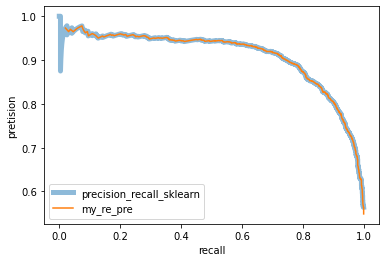

In [ ]:
plt.plot( re, pr, label = 'precision_recall_sklearn',alpha =0.5 ,  lw= 5 )
plt.plot( re_my, pr_my, label = 'my_re_pre' )
plt.xlabel('recall')
plt.ylabel('pretision')
# plt.plot([0,1],[0,1],'-r')

plt.legend( loc = 0 )
plt.show()

8.*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [ ]:
from sklearn.metrics import auc
auc( fpr_my, tpr_my)
# Количественная интерпретация ROC - 0.9055582188132523

0.9054910666727541

In [ ]:
print(f'площадь roc из sklern больше на : {0.9055582188132523 - 0.9054910666727541}')

площадь roc из sklern больше на : 6.71521404981279e-05


9.
Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

In [ ]:
# a. модель уверенно распознаёт пол
# b. может, но это значит что модель работает наоборот
# (все мужчинв это женщины и наоборот). нужно инвертировать критерий
